# 탐색적 데이터 분석
## 1.데이터 불러오기

In [1]:
data_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/'
train_path = data_path + 'train/'
valid_path = data_path + 'val/'
test_path = data_path + 'test/'

In [2]:
from glob import glob

print(f'훈련 데이터 개수: {len(glob(train_path + "*/*"))}')
print(f'검증 데이터 개수: {len(glob(valid_path + "*/*"))}')
print(f'테스트 데이터 개수: {len(glob(test_path + "*/*"))}')

훈련 데이터 개수: 5216
검증 데이터 개수: 16
테스트 데이터 개수: 624


In [3]:
glob(train_path + "*")

['/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA',
 '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL']

In [4]:
glob(valid_path + "*")

['/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA',
 '/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL']

In [5]:
glob(test_path + "*")

['/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA',
 '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL']

In [6]:
all_normal_imgs = []
all_pneumonia_imgs = []

for cat in ['train/', 'val/', 'test/']:
    data_cat_path = data_path + cat
    normal_imgs = glob(data_cat_path + 'NORMAL/*')
    pneumonia_imgs = glob(data_cat_path + 'PNEUMONIA/*')
    all_normal_imgs.extend(normal_imgs)
    all_pneumonia_imgs.extend(pneumonia_imgs)
    
print(f'정상 흉부 이미지 개수: {len(all_normal_imgs)}')
print(f'폐렴 흉부 이미지 개수: {len(all_pneumonia_imgs)}')

정상 흉부 이미지 개수: 1583
폐렴 흉부 이미지 개수: 4273


# 데이터 시각화
## 1.타깃값 분포

([<matplotlib.patches.Wedge at 0x7833317cf8e0>,
 [Text(0.7266104793469584, 0.8258554421345079, 'Normal'),
  Text(-0.7266104020247887, -0.825855510164687, 'Pneumonia')],
 [Text(0.39633298873470457, 0.4504666048006406, '27.0%'),
  Text(-0.3963329465589756, -0.450466641908011, '73.0%')])

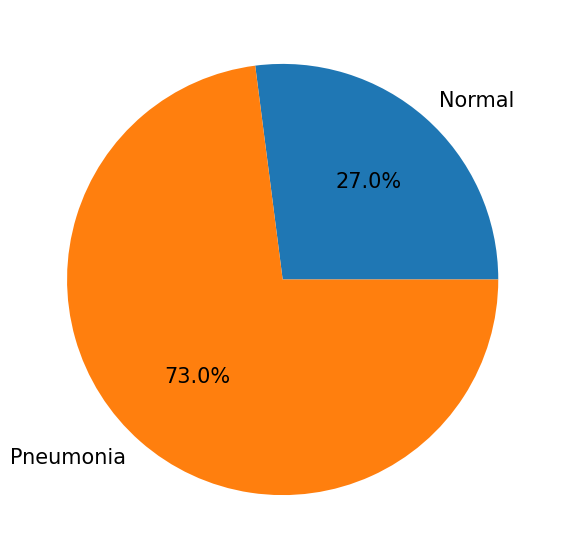

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7, 7))
label = ['Normal', 'Pneumonia']
plt.pie([len(all_normal_imgs), len(all_pneumonia_imgs)], labels=label, autopct='%.1f%%')

## 2.이미지 출력

In [8]:
import matplotlib.gridspec as gridspec
import cv2

def show_image(img_paths, rows=2, cols=3):
    assert len(img_paths) <= rows * cols
    plt.figure(figsize=(15, 8))
    grid = gridspec.GridSpec(rows, cols)
    
    for idx, img_path in enumerate(img_paths):
        image = cv2.imread(img_path)                   # 이미지 파일 읽기
        ax = plt.subplot(grid[idx])                    # 서브플롯
        ax.imshow(image)                               # 이미지 출력

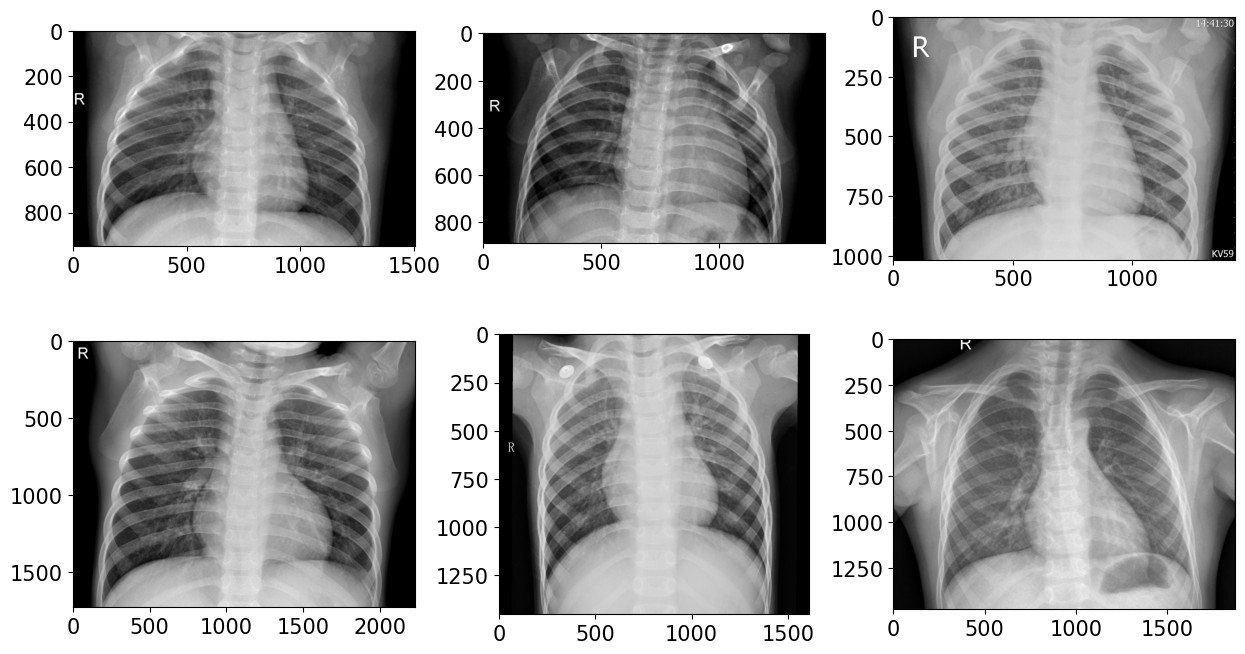

In [9]:
# 정상 엑스선 이미지 경로(마지막 6장)
num_of_imgs = 6
normal_img_paths = all_normal_imgs[-num_of_imgs:]
show_image(normal_img_paths)

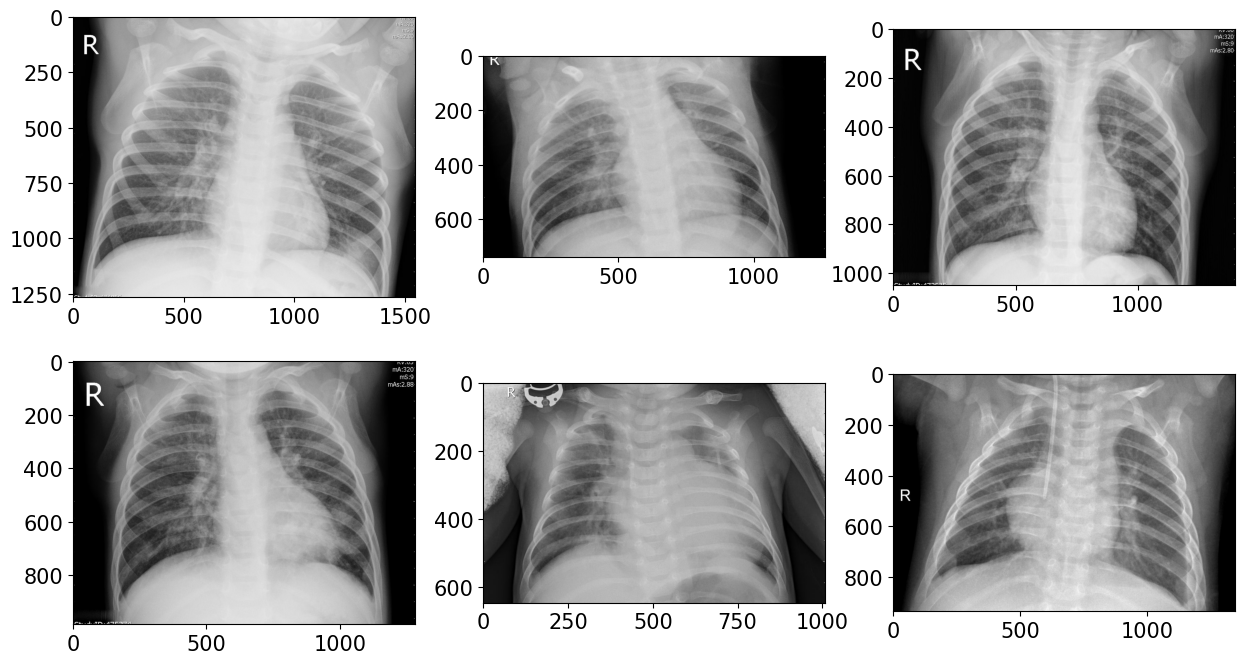

In [10]:
# 폐렴 엑스선 이미지 경로(마지막 6장)
pneumonia_img_paths = all_pneumonia_imgs[-num_of_imgs:]
show_image(pneumonia_img_paths)